# Intro

## Create sample with sample()

In [7]:
# Dùng sample() để tạo mẫu  
# x = sample(num_start:num_end, size=number_sample, replace=TRUE) # replace = True là lấy ra có hoàn lại 
x = sample(0:2, size=200, replace=TRUE, prob=c(.2, .3, .5))
table(x)

x
 0  1  2 
39 62 99 

In [8]:
x = sample(letters)
x

[1] "u" "c" "d" "f" "z" "a" "t" "s" "k" "b" "n" "h" "e" "x" "q" "m" "l" "y" "v"
[20] "p" "o" "j" "g" "r" "i" "w"

## Random Generators of Common Probability Distributions in R

In [ ]:
# The probability mass function (pmf) or density (pdf), 
# cumulative distribution function (cdf), 
# quantile function, 
# and random generator of many commonly used probability distributions are available. 
# For example, four functions are documented in the help topic Binomial:
dbinom(x, size, prob, log = FALSE)
pbinom(q, size, prob, lower.tail = TRUE, log.p = FALSE)
qbinom(p, size, prob, lower.tail = TRUE, log.p = FALSE)
rbinom(n, size, prob)

# Phương pháp sinh dữ liệu 1: The Inverse Transform Method

Đây là phương pháp sinh dữ liệu biến ngẫu nhiên dựa trên 2 hệ quả nổi tiếng.

Lý thuyết 1: (Probability Integral Transformation - Xác suất tích phân chuyển đổi). If X is a continuous random variable with cdf FX(x), then U = FX (X) ∼ Uniform(0, 1).

Phương pháp này có thể tóm tắt như sau:  
1. Chuyển về hàm nghịch của nguyên hàm của hàm mật độ FX(u) (tạm gọi là f(u))  
2. Tính toán hàm f này  
3. Với mỗi biến ngẫu nhiên được yêu cầu:  
  -  Tạo 1 u ngẫu nhiên từ Uniform(0, 1)  
  -  Gán x = f(u)

## Sử dụng phương pháp với trường hợp dữ liệu liên tục  

Ví dụ 2. Biến X có hàm mật độ $f(x) = 3x^2$ với  $0 < x < 1$.  

-> $F(x) = x^3$ với 0 < x < 1.  
-> $F^{-1}(u) = u^{-1/3}$

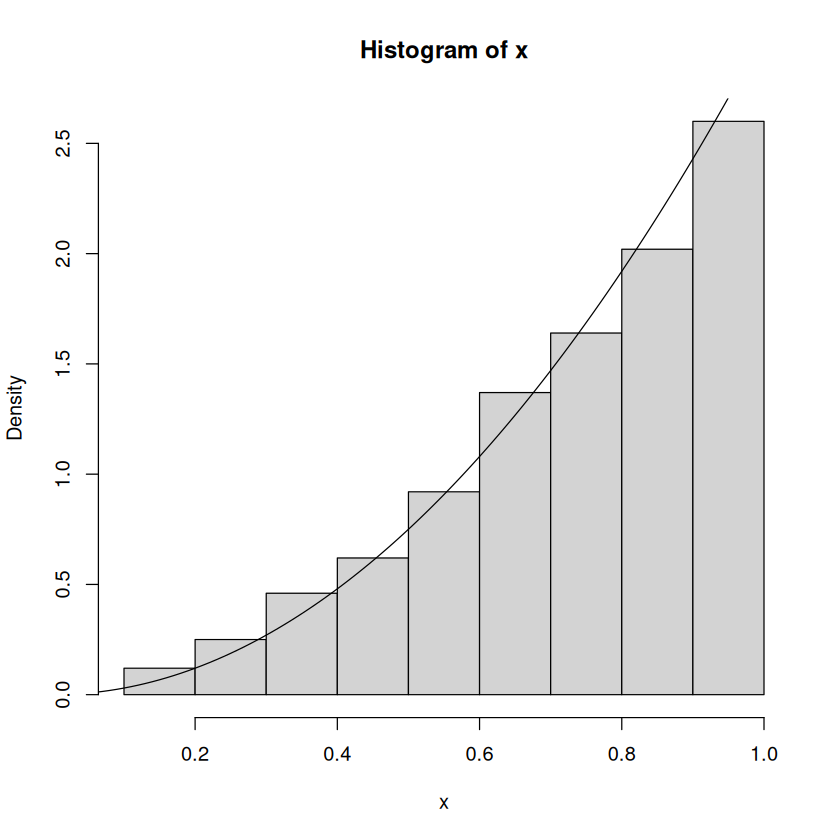

In [1]:
n <- 1000
u <- runif(n)   # Tạo một vector u gồm n giá trị ngẫu nhiên từ phân phối đều liên tục trên khoảng [0,1]
x <- u^(1 / 3)  # Tính toán một vector x bằng cách lấy căn bậc ba của từng phần tử trong vector u. Điều này tạo ra một phân phối không đều, với mật độ tập trung ở các giá trị nhỏ hơn của x.
hist(x, prob = TRUE)    # Vẽ histogram của vector x, với prob = TRUE để hiển thị mật độ xác suất thay vì số lượng trong từng bin.
y <- seq(0, 1, .01)     # Tạo một vector y chứa các giá trị từ 0 đến 1 với bước nhảy là 0.01. Điều này sẽ được sử dụng để vẽ đường cong mật độ xác suất.
lines(y, 3*y^2) # Vẽ đường cong mật độ xác suất trên histogram. Đường cong được xác định bởi hàm mật độ xác suất f(x) = 3x^2, nơi y là biến độc lập và 3*y^2 là giá trị mật độ xác suất tương ứng.

Ví dụ 3. (Phân phối mũ) Sử dụng phương pháp inverse transform để tạo mẫu ngẫu nhiên từ phân phối mũ với giá trị trung bình là $\frac{1}{\lambda}$.

Nếu X theo phân phối Exp(lambda) thì với x > 0 X có nguyên hàm của hàm mật độ là $F(x) = 1 - e^{-\lambda x}$

Và như vậy Inverse Transformation là hàm $F^{-1}(u) = \frac{-1}{\lambda}\log(1 - u)$

Sau cùng để tạo 1 mẫu random với size n với tham số $\lambda$ là: $\frac{-\log(runif(n))}{\lambda}$.

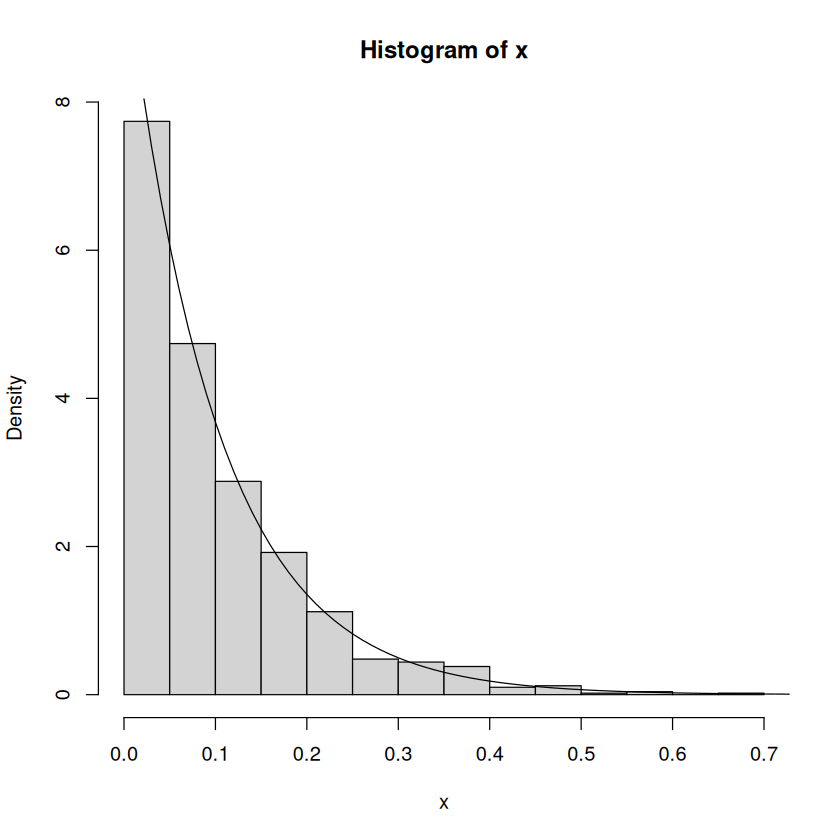

In [6]:
lambda <- 10
n <- 1000
u <- runif(n)   # Tạo một vector u gồm n giá trị ngẫu nhiên từ phân phối đều liên tục trên khoảng [0,1]
x <- - 1 / lambda * log(1 - u)  # Tính toán một vector x bằng cách lấy căn bậc ba của từng phần tử trong vector u. Điều này tạo ra một phân phối không đều, với mật độ tập trung ở các giá trị nhỏ hơn của x.
hist(x, prob = TRUE)    # Vẽ histogram của vector x, với prob = TRUE để hiển thị mật độ xác suất thay vì số lượng trong từng bin.
y <- seq(0, 1, .01)     # Tạo một vector y chứa các giá trị từ 0 đến 1 với bước nhảy là 0.01. Điều này sẽ được sử dụng để vẽ đường cong mật độ xác suất.
lines(y, lambda * exp(-lambda * y)) # Hàm mật độ xác suất cho phân phối mũ là f(y)=λ×e(−λy), nơi λ là tham số của phân phối.

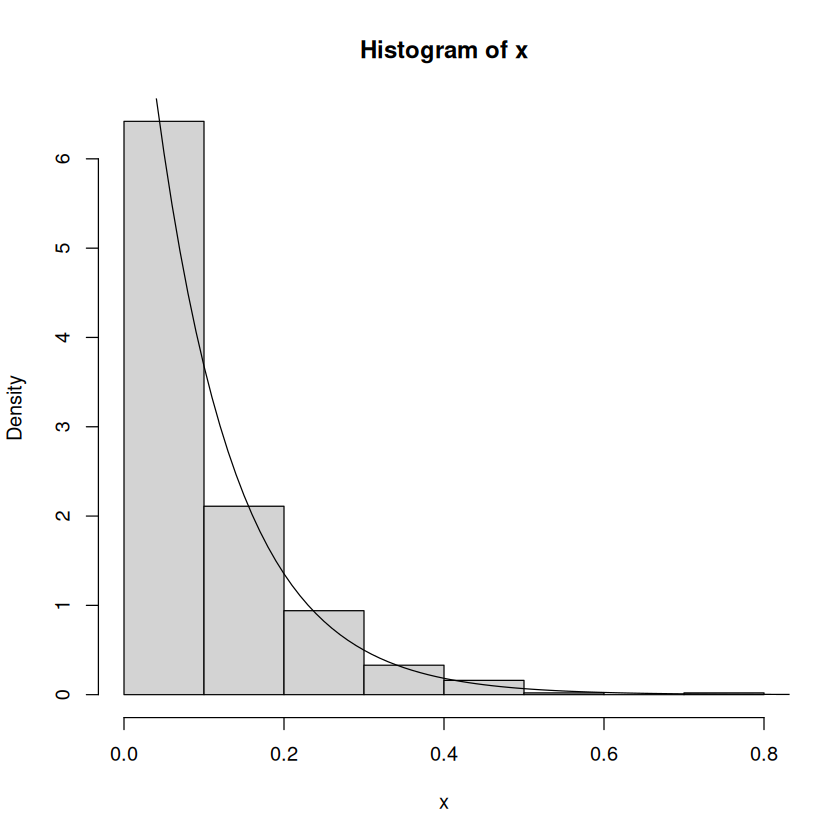

In [9]:
# cách sử dụng trực tiếp hàm rexp có sẵn trong R
lambda <- 10
x <- rexp(1000, lambda) # Khởi tạo 1000 giá trị 
hist(x, prob = TRUE)
y <- seq(0, 1, .01)     # Tạo một vector y chứa các giá trị từ 0 đến 1 với bước nhảy là 0.01. Điều này sẽ được sử dụng để vẽ đường cong mật độ xác suất.
lines(y, lambda * exp(-lambda * y)) # Hàm mật độ xác suất cho phân phối mũ là f(y)=λ×e(−λy), nơi λ là tham số của phân phối.

## Sử dụng phương pháp với dữ liệu rời rạc 

If X is a discrete random variable and  
$... < x_{i−1} < x_{i} < x_{i+1} < ...$  
are the points of discontinuity of $F_X(x)$, then the inverse transformation is
$F^{−1}_X(u) = x_{i}$, where $F_X(x_{i−1}) < u \leq F_X(x_{i})$.
For each random variate required:
1. Generate a random u from Uniform(0,1).
2. Deliver $x_i$ where $F_X(x_{i−1}) < u \leq F_X(x_{i})$.


Ví dụ 4. (Phân phối nhị thức)  
Mẫu ngẫu nhiên của Bernoulli (p = 0.4). Mặc dù có phương pháp đơn giản hơn cho phân phối này trong R.  
Trong ví dụ này, $F_{X}(0) = f_{X}(0) = 1 - p$ và $F_X{1} = 1$ nếu u > 0.6 và $F^{-1}_{X}(u) = 0$ nếu $u \leq 0.6$.  
Code gen dưới đây sẽ để biểu thức điều kiện u > 0.6.

In [10]:
n <- 1000   # gán n = 1000 
p <- 0.4    # gán p = 0.4
u <- runif(n)   # tạo ra 1000 giá trị ngẫu nhiên trong khoảng (0, 1)
x <- as.integer(u > 0.6) # (u > 0.6) is a logical vector
mean(x)
var(x)

[1] 0.409

[1] 0.241961

In [11]:
# cách 2: sử dụng hàm rbinom có sẵn trong R 
n <- 1000   # gán n = 1000 
p <- 0.4    # gán p = 0.4
rbinom(n, size = 1, prob = p)
sample(c(0,1), size = n, replace = TRUE, prob = c(.6,.4))

[1] 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1
  [38] 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0
  [75] 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1
 [112] 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1
 [149] 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1
 [186] 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1
 [260] 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 [297] 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1
 [334] 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1
 [371] 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 [408] 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0
 [445] 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0
 [482] 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 [519] 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1
 [556] 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1
 [593] 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1
 [630] 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 [667] 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0
 [704] 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 [741] 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0
 [778] 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1
 [815] 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1
 [852] 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 [889] 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 [963] 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0
[1000] 1

[1] 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1
  [38] 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0
  [75] 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1
 [112] 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1
 [149] 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0
 [186] 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0
 [223] 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 [260] 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1
 [297] 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0
 [334] 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0
 [371] 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1
 [408] 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1
 [445] 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0
 [482] 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1
 [519] 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0
 [556] 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 [593] 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0
 [630] 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1
 [667] 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 [704] 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1
 [741] 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 [778] 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1
 [815] 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1
 [852] 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 [889] 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1
 [926] 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1
 [963] 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0
[1000] 0

Ví dụ 5. (Phân phối hình học) Tạo mâu phân phối hình học với tham số p = 0.25. 

Hàm mật độ (pmf) là $f(x) = pq^x$ với $x = 0, 1, 2, ...$ khi $q = 1 - p$.  
Và như vậy, cdf là $F(x) = 1 - q^{x + 1}$.  
Với mỗi phần tử của mẫu ngẫu nhiên ta có 1 biến u ngẫu nhiên chuẩn và giải:  
$1 - q^x < u \leq 1 - q^{x + 1}$.  
Giải ra với x ta được  
$x < \frac{log(1-u)}{log(q)} \leq x + 1$  
-> $x + 1 = \lceil\frac{log(1-u)}{log(q)}\rceil$

In [13]:
n <- 1000
p <- 0.25
u <- runif(n)
k <- ceiling(log(1 - u) / log(1 - p)) - 1
k

[1]  5  2 11  4  2 10  5  6  0  5  1  0  1  2 12  8  2  3  2 12  1  6  6 15
  [25]  7  2  5  4  4  1  2  1  1  0  3  1  0  4  2  1  4  1  1  1  0  1  5  9
  [49]  2  7  0  1 12  4  9  2  2  5  3  0  0  5  1  6  2  6  8  0  6  0  3 13
  [73]  3  7  2  0  1  1  0  0  4  0  1  4  0  1  0  1  1 23  0  1  3  0  8  1
  [97]  2  0  4  8  2  3  0  2  1  1  6  2  2  1  3  4  2  0  5  6  1  1  2  1
 [121]  1  0  3 10  6  0  1 10  0  2  1  0  6  0  4 12  3  4  3  0  2  2  1  1
 [145]  3  3  2  2  0  9  1  8  2  0  0  0  3  5  0  1 12  6  4  4  0  4  0  5
 [169] 16  5  4  1  0  0 15  2  5  3  5  1  6  1  1  0  3  0  6  7  4  2  7  5
 [193]  0  2  6  9  0  6  2  2  1  0 10  1  1  5  1  0  2 14  0  4  3  5  3  6
 [217]  2  0  3  2  1  0  3  3  0  5  2  2  0  1  1  3  0  2  4  4  3  1  4  1
 [241]  1  4  2  6  5  6  2  0  0  0  2  6  0  1  3  9  6  0  5  0  4  3 16  3
 [265]  1  3  0  3  6  3  9  3  4  3  6  0  1  1  1  5  2  1  0  1  1  0  1  3
 [289]  3  1  6  0  1  3 11  4  1  2  5  5  5  0  3  0  5  3  3  4  0  0  5  0
 [313]  4 10  2  3  4  1  2  2  4  1  1  2  3  2  2  0  2  4  0  3  0  0  6  0
 [337]  1  2  1  1  2  7  5  2  3  0  7  0  5  3  9  2  1  1  0  5 10  3  2  0
 [361]  2  1  4  1  0 12  3  2  5  0  0  1  0  5  0  9  2  2  0 10  5  7  8 10
 [385]  0  7  1  4  0  2  0  5  4 12  0  2  0  4  0  0  4  2  0 10  1  0  4  0
 [409]  0  0  7  0 11  6  1  2  3 11  3  2 16  0  0  6 15  8  1  1  0  2  7  1
 [433]  0  3  1  0  6  6  1  4  2  5  6 12  4  4  0  0  0  1  1  9  0  3  2  1
 [457]  7  1  1  2  3  3  2  0  1  5  0  0  8  1  0  8  7  7  1  1  4 14  0  0
 [481]  2  0  0  1  7  5  0 10  0  1  0  5  1 11  1  4  5  0  6  4  0  2  5  5
 [505]  0  0  1  3 15  0  2  1  2  0  4  5  5  1  3  6  7  0  2 10  3  3  2  2
 [529]  2  0  2  2  0  5  0  2 14  5  0  0  0  0  7  2  3  0  9  6  5  9  1  3
 [553]  1  6  7  4  0  5  1 10  3  0  5 21  4  1  1 11  0  0  3  0  0  5  0  0
 [577]  1  2  0  3  0  0  8  2  3  2  5  2  1  1  3  4  0  0  0  4  2  1  5  1
 [601]  0  0  2 12  1  2  0  2  1  5  1  0  1  1  3  2  4  0  1  5 14  7  6  0
 [625]  0  2  5  4 11  0  2  1  0 13  0  4  2  2  2  1  0  1  2  2  4  4  1  0
 [649]  4  0  7  2  2  3  8 10  1  1 11  0  1  1  1  1  1  2 14  1  8  0  1  4
 [673]  2 11  5  6  4  6  2  0  4  2  6  0  2  0  3  6  6  4  0  3  0  0  2  3
 [697]  0  0  2  2  7  4  0  1  0  4  3  1  1  5  2  1  6  0  2  2  0  2  4  8
 [721]  2  6  1  2  4  0  3  4 10  0  3  0  1  3  0  3  7  0 19  1  4  2  2  9
 [745]  1  2  2  0  4  1  1  7  3  3  0  1  1  5  4  1  0  0  1  1  5  0  2  2
 [769]  0  0  6  3  6  1  0  2  2  5  1  2  6  0  2  2  1  5  0  2  3  1  0  6
 [793]  2  9  0 10  4  4  3 13  1  1  6  0  0  4  0  1  4  1 10  3  8  3  0  0
 [817]  1 11  5  3  7  5  2  6  0  1  0  2  9  0  4  1  7 11  1  0  6  1  0  9
 [841]  0  7  4  1  1  0  1  3  9  8  4  0  2  9  2  3  0  3  1  7  1  0  3 16
 [865]  1  3  2  0  2  4  7  4  4  7  1  0  7  0  2  2  2  0  7  9  1  2  0  1
 [889]  3  5  4  2  3  0  2  5  3  1  3  2  5  1  8  2  7  3  6  0  3  2  2  0
 [913]  4  4  1  1  0  3  3  1  2  0  1  1  1  0  6 13  0  2  4  1  0  8  3 10
 [937]  5  2 12  1  0  1  5  2  0  1  0 14  3  3  2  0  3  1  2  1  6  3  3  0
 [961]  3  3  2  2  1  0  3  5  5  1  3  3  1  4  0  4  2  0  3 11  2  2  5  2
 [985]  0 10  1  9  2  4  6  4  1  6  7  3  2  1  1  8

Ví dụ 6. (Phân phối Logarithmic)  

In [14]:
rlogarithmic <- function(n, theta) {
    # returns a random logarithmic(theta) sample size n
    u <- runif(n)
    # set the initial length of cdf vector
    N <- ceiling(-16 / log10(theta))
    k <- 1:N
    a <- -1 / log(1 - theta)
    fk <- exp(log(a) + k * log(theta) - log(k))
    Fk <- cumsum(fk)
    x <- integer(n)
    for (i in 1:n) {
        x[i] <- as.integer(sum(u[i] > Fk)) # F^{-1}(u)-1
        while (x[i] == N) {
            # if x==N we need to extend the cdf
            # very unlikely because N is large
            logf <- log(a) + (N + 1) * log(theta) - log(N + 1)
            fk <- c(fk, exp(logf))
            Fk <- c(Fk, Fk[N] + fk[N + 1])
            N <- N + 1
            x[i] <- as.integer(sum(u[i] > Fk))
        }
    }
    x + 1
}

In [17]:
n <- 1000
theta <- 0.5
x <- rlogarithmic(n, theta)
#compute density of logarithmic(theta) for comparison
k <- sort(unique(x))
p <- -1 / log(1 - theta) * theta^k / k
se <- sqrt(p * (1 - p) / n) # standard error
round(rbind(table(x)/n, p, se),3)

,1,2,3,4,5,6,7,8,11
,0.724,0.193,0.056,0.017,0.005,0.001,0.002,0.001,0.001
p,0.721,0.180,0.060,0.023,0.009,0.004,0.002,0.001,0.000
se,0.014,0.012,0.008,0.005,0.003,0.002,0.001,0.001,0.000
